<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импортируем-необходимые-библиотеки:" data-toc-modified-id="Импортируем-необходимые-библиотеки:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импортируем необходимые библиотеки:</a></span></li><li><span><a href="#Загрузка-данные-и-проведение-первичного-осмотра,-обработки-и-анализа" data-toc-modified-id="Загрузка-данные-и-проведение-первичного-осмотра,-обработки-и-анализа-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данные и проведение первичного осмотра, обработки и анализа</a></span></li><li><span><a href="#Распределение-целевого-признака" data-toc-modified-id="Распределение-целевого-признака-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Распределение целевого признака</a></span></li><li><span><a href="#Борьба-с-дисбалансом-классов" data-toc-modified-id="Борьба-с-дисбалансом-классов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Борьба с дисбалансом классов</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-и-векторизация-текста" data-toc-modified-id="Разделение-данных-и-векторизация-текста-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разделение данных и векторизация текста</a></span></li><li><span><a href="#Обучение-и-оценка-моделей" data-toc-modified-id="Обучение-и-оценка-моделей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение и оценка моделей</a></span></li><li><span><a href="#Получение-результирующей-таблицы" data-toc-modified-id="Получение-результирующей-таблицы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Получение результирующей таблицы</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Необходимо обучить модель классифицировать комментарии на позитивные и негативные. В нашем распоряжении набор данных с разметкой о токсичности правок.

Построим модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузим и подготовим данные.
2. Обучим разные модели. 
3. Сделаем выводы.

Для выполнения проекта применять *BERT* необязательно.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Импортируем необходимые библиотеки:

In [1]:
!/opt/conda/bin/python -m pip install wordcloud 

In [2]:
!pip install --upgrade Pillow  (попробуй версию 9.5.0)

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `pip install --upgrade Pillow  (попробуй версию 9.5.0)'


In [3]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pytagcloud pygame

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install simplejson

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import re
import spacy
from collections import Counter
import random
from pytagcloud import create_tag_image, make_tags
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from tqdm import tqdm
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import logging

pygame 2.6.0 (SDL 2.28.4, Python 3.9.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Загрузка данные и проведение первичного осмотра, обработки и анализа

In [7]:
data = pd.read_csv('/datasets/toxic_comments.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


In [9]:
data.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


**Избавимся от столбца Unnamed: 0, так как:**
- Он не является частью данных: этот столбец  содержит дублирующую информацию об индексах строк, которые уже присутствуют в DataFrame.
- Засорение данных: Лишний столбец усложняет анализ данных и делает DataFrame менее удобным для работы.
- Потенциальные ошибки: Ненужный столбец может привести к путанице или ошибкам при анализе данных.

In [10]:
data.drop(columns='Unnamed: 0', inplace = True)
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


**Текстовые данные часто содержат шум, который нужно удалить:**

- Привести текст к нижнему регистру
- Удалить пунктуации и специальные символы
- Удалить стоп-слова 
- Выполнить лемматизацию (приведение слов к их базовой форме)

In [11]:
# # Приведение текста к нижнему регистру и удаление спецсимволов
# def preprocess_text(text):
#     text = text.lower()
#     text = re.sub(r'\W', ' ', text)
#     text = re.sub(r'\s+', ' ', text)
#     return text

# data['clean_text'] = data['text'].apply(preprocess_text)

# # Удаление стоп-слов и лемматизация
# stop_words = set(stopwords.words('english'))
# lemmatizer = WordNetLemmatizer()

# def remove_stopwords_lemmatize(text):
#     words = text.split()
#     words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
#     return ' '.join(words)

# data['clean_text'] = data['clean_text'].apply(remove_stopwords_lemmatize)

# data.head()

In [12]:
# Загрузка модели SpaCy
nlp = spacy.load('en_core_web_sm')

# Приведение текста к нижнему регистру и удаление спецсимволов
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

# Лемматизация текста с использованием SpaCy
def spacy_lemmatize(doc):
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])

# Применение предобработки и лемматизации с использованием SpaCy
def preprocess_and_lemmatize_iterative(texts, batch_size=100):
    texts_processed = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        batch_texts = [preprocess_text(text) for text in batch_texts]
        docs = list(nlp.pipe(batch_texts, batch_size=batch_size))
        lemmatized_texts = [spacy_lemmatize(doc) for doc in docs]
        texts_processed.extend(lemmatized_texts)
    return texts_processed

# Применение к данным
data['clean_text'] = preprocess_and_lemmatize_iterative(data['text'].tolist(), batch_size=100)

# Сохранение результатов в файл
data.to_csv('cleaned_data_spacy.csv', index=False)

# Проверка результата
data.head()

,text,toxic,clean_text
0,Explanation\nWhy the edits made under my usern...,0,explanation edit username hardcore metallica f...
1,D'aww! He matches this background colour I'm s...,0,d aww match background colour m seemingly stuc...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man m try edit war s guy constantly remove...
3,"""\nMore\nI can't make any real suggestions on ...",0,t real suggestion improvement wonder section...
4,"You, sir, are my hero. Any chance you remember...",0,sir hero chance remember page s


Нужно оставить только один столбец с текстом, который будем использовать для анализа. 

`text` - исходный текст, который может содержать нежелательные символы и форматы.

`clean_text` - очищенный текст, подходящий для анализа.


Для создания облака слов нам наиболее полезен столбец clean_text, так как он уже очищен и подготовлен для анализа. Следовательно, столбец text можно удалить.

In [13]:
data.drop(columns='text', inplace = True)
data.head()

,toxic,clean_text
0,0,explanation edit username hardcore metallica f...
1,0,d aww match background colour m seemingly stuc...
2,0,hey man m try edit war s guy constantly remove...
3,0,t real suggestion improvement wonder section...
4,0,sir hero chance remember page s


### Распределение целевого признака

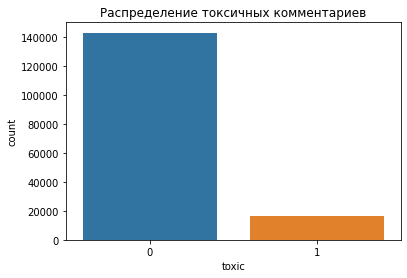

In [14]:
sns.countplot(x='toxic', data=data)
plt.title('Распределение токсичных комментариев')
plt.show()

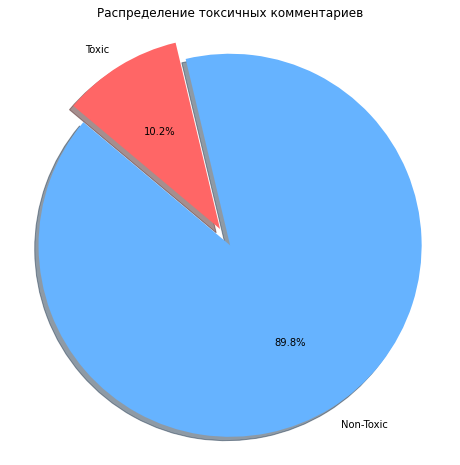

In [15]:
# Подсчёт количества токсичных и нетоксичных комментариев
toxic_counts = data['toxic'].value_counts()

# Построение круговой диаграммы
labels = ['Non-Toxic', 'Toxic']
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)  

plt.figure(figsize=(8, 8))
plt.pie(toxic_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Распределение токсичных комментариев')
plt.axis('equal')  
plt.show()

Видно, что:

- 89.8% комментариев нетоксичные.
- 10.2% комментариев токсичные.


На основе этих данных можно сделать следующий вывод о балансе классов:

- Нетоксичные комментарии: 89.8%
- Токсичные комментарии: 10.2%

Это указывает на значительный дисбаланс классов, с преобладанием нетоксичных комментариев. Такой дисбаланс нужно учитывать при построении моделей машинного обучения, так как он может влиять на качество модели. 



Возможно, потребуется использовать методы для работы с несбалансированными данными, такие как:

- Oversampling: Увеличение количества примеров меньшего класса (токсичные).
- Undersampling: Уменьшение количества примеров большего класса (нетоксичные).
- Взвешивание классов: Использование взвешенных потерь для модели машинного обучения, чтобы учесть дисбаланс классов.


Эти методы помогут создать более сбалансированные и надежные модели.

### Борьба с дисбалансом классов

In [16]:
# Разделение данных на обучающую и валидационную выборки
X = data['clean_text']
y = data['toxic']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Векторизация текста
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_val_vect = vectorizer.transform(X_val)

In [17]:
# Модель логистической регрессии без изменения весов
lr = LogisticRegression(random_state=42)
lr.fit(X_train_vect, y_train)

# Оценка на кросс-валидации
f1_cv_lr = cross_val_score(lr, X_train_vect, y_train, cv=5, scoring='f1').mean()
auc_roc_cv_lr = cross_val_score(lr, X_train_vect, y_train, cv=5, scoring='roc_auc').mean()

# Оценка на валидационном наборе
y_val_pred_lr = lr.predict(X_val_vect)
f1_val_lr = f1_score(y_val, y_val_pred_lr)
auc_roc_val_lr = roc_auc_score(y_val, lr.predict_proba(X_val_vect)[:, 1])


In [18]:
# Модель логистической регрессии с взвешиванием классов
lr_weighted = LogisticRegression(class_weight='balanced', random_state=42)
lr_weighted.fit(X_train_vect, y_train)

# Оценка на кросс-валидации
f1_cv_lr_weighted = cross_val_score(lr_weighted, X_train_vect, y_train, cv=5, scoring='f1').mean()
auc_roc_cv_lr_weighted = cross_val_score(lr_weighted, X_train_vect, y_train, cv=5, scoring='roc_auc').mean()

# Оценка на валидационном наборе
y_val_pred_lr_weighted = lr_weighted.predict(X_val_vect)
f1_val_lr_weighted = f1_score(y_val, y_val_pred_lr_weighted)
auc_roc_val_lr_weighted = roc_auc_score(y_val, lr_weighted.predict_proba(X_val_vect)[:, 1])

In [19]:
# Пайплайн для андерсэмплинга и логистической регрессии
pipeline_under = ImbPipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('model', LogisticRegression(random_state=42))
])

pipeline_under.fit(X_train_vect, y_train)

# Оценка на кросс-валидации
f1_cv_lr_under = cross_val_score(pipeline_under, X_train_vect, y_train, cv=5, scoring='f1').mean()
auc_roc_cv_lr_under = cross_val_score(pipeline_under, X_train_vect, y_train, cv=5, scoring='roc_auc').mean()

# Оценка на валидационном наборе
y_val_pred_lr_under = pipeline_under.predict(X_val_vect)
f1_val_lr_under = f1_score(y_val, y_val_pred_lr_under)
auc_roc_val_lr_under = roc_auc_score(y_val, pipeline_under.predict_proba(X_val_vect)[:, 1])

In [20]:
# Пайплайн для оверсэмплинга и логистической регрессии
pipeline_smote = ImbPipeline([
    ('over', SMOTE(random_state=42)),
    ('model', LogisticRegression(random_state=42))
])

pipeline_smote.fit(X_train_vect, y_train)

# Оценка на кросс-валидации
f1_cv_lr_smote = cross_val_score(pipeline_smote, X_train_vect, y_train, cv=5, scoring='f1').mean()
auc_roc_cv_lr_smote = cross_val_score(pipeline_smote, X_train_vect, y_train, cv=5, scoring='roc_auc').mean()

# Оценка на валидационном наборе
y_val_pred_lr_smote = pipeline_smote.predict(X_val_vect)
f1_val_lr_smote = f1_score(y_val, y_val_pred_lr_smote)
auc_roc_val_lr_smote = roc_auc_score(y_val, pipeline_smote.predict_proba(X_val_vect)[:, 1])

In [21]:
# Составление таблицы с результатами
results = pd.DataFrame({
    'Метод': ['LogisticRegression', 'LR с взвешиванием классов', 'LR с андерсэмплингом', 'LR с оверсэмплингом'],
    'F1 на кросс-валидации': [f1_cv_lr, f1_cv_lr_weighted, f1_cv_lr_under, f1_cv_lr_smote],
    'F1 на валидации': [f1_val_lr, f1_val_lr_weighted, f1_val_lr_under, f1_val_lr_smote],
    'AUC-ROC': [auc_roc_val_lr, auc_roc_val_lr_weighted, auc_roc_val_lr_under, auc_roc_val_lr_smote]
})

results

,Метод,F1 на кросс-валидации,F1 на валидации,AUC-ROC
0,LogisticRegression,0.720604,0.739417,0.969733
1,LR с взвешиванием классов,0.751239,0.755703,0.971335
2,LR с андерсэмплингом,0.703357,0.705008,0.964100
3,LR с оверсэмплингом,0.650796,0.673984,0.950906


Модель с взвешиванием классов демонстрирует лучшие результаты по метрике F1, как на кросс-валидации, так и на валидации. AUC-ROC также немного выше, что свидетельствует о лучшем качестве классификации. 

**Использование взвешивания классов помогает лучше справляться с дисбалансом классов.**

### Вывод:

- Избавились от дублирующего и неинформативного столбца Unnamed: 0
* Привели текст к нижнему регистру
* Удалили пунктуации и специальные символы
* Удалили стоп-слова
* Выполнили лемматизацию (приведение слов к их базовой форме)

- Оставили только один столбец с текстом, который использовали дальше, а точнее:
    - clean_text - очищенный текст.

После построения графиков распределения целевого признака выяснили, что:
* 89.8% комментариев нетоксичные.
* 10.2% комментариев токсичные.

- Это указывало на значительный дисбаланс классов, с преобладанием нетоксичных комментариев. 
- Пришли к выводу, что дисбаланс нужно учитывать при построении моделей машинного обучения, так как он может влиять на качество модели.


- Использовали методы для работы с несбалансированными данными, такие как:
* Oversampling: Увеличение количества примеров меньшего класса (токсичные).
* Undersampling: Уменьшение количества примеров большего класса (нетоксичные).
* Взвешивание классов: Использование взвешенных потерь для модели машинного обучения, чтобы учесть дисбаланс классов.


- Эти методы помогли создать более сбалансированные и надежные модели.


- Выяснили, что использование взвешивания классов помогает лучше справляться с дисбалансом классов.

## Обучение

### Разделение данных и векторизация текста
- Разделим данные на обучающую, валидационную и тестовую выборки и используем TfidfVectorizer для преобразования текстовых данных в числовой формат.

In [22]:
# Настройка ведения журнала
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')

X = data['clean_text']
y = data['toxic']

# Разделение данных
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Векторизация текста
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

# Вывод информации о выборках
train_pct = len(X_train) / len(X) * 100
val_pct = len(X_val) / len(X) * 100
test_pct = len(X_test) / len(X) * 100
logging.info(f'Обучающая выборка: {len(X_train)} элементов ({train_pct:.2f}%)')
logging.info(f'Валидационная выборка: {len(X_val)} элементов ({val_pct:.2f}%)')
logging.info(f'Тестовая выборка: {len(X_test)} элементов ({test_pct:.2f}%)')

2024-07-06 12:16:43,648 - Обучающая выборка: 111504 элементов (70.00%)
2024-07-06 12:16:43,649 - Валидационная выборка: 23894 элементов (15.00%)
2024-07-06 12:16:43,649 - Тестовая выборка: 23894 элементов (15.00%)


### Обучение и оценка моделей
- Обучим модели LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, и LGBMClassifier с различными гиперпараметрами. 
- Оценим модели на валидационной выборке по метрике F1.

In [23]:
# Определение моделей и их гиперпараметров
models = {
    'LogisticRegression': {
        'model': LogisticRegression(class_weight='balanced', max_iter=1000),
        'params': {
            'C': [0.1, 1, 10]
        },
        'search': GridSearchCV
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(class_weight='balanced'),
        'params': {
            'max_depth': [10, 20, 30]
        },
        'search': GridSearchCV
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(class_weight='balanced'),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, 30]
        },
        'search': GridSearchCV
    },
    'LGBMClassifier': {
        'model': LGBMClassifier(class_weight='balanced'),
        'params': {
            'num_leaves': [30, 50],
            'learning_rate': [0.1, 0.2]
        },
        'search': RandomizedSearchCV
    }
}

# Результирующая таблица
results = []

# Обучение и оценка моделей
for model_name, model_info in models.items():
    logging.info(f'Обучение модели {model_name}')
    if model_info['search'] == GridSearchCV:
        clf = GridSearchCV(model_info['model'], model_info['params'], scoring='f1', cv=3, verbose=3)
    else:
        clf = RandomizedSearchCV(model_info['model'], model_info['params'], scoring='f1', cv=3, verbose=3, n_iter=10, random_state=42)
    
    clf.fit(X_train_vec, y_train)
    y_val_pred = clf.predict(X_val_vec)
    f1 = f1_score(y_val, y_val_pred)
    best_params = clf.best_params_
    results.append({'Model': model_name, 'F1 Score': f1, 'Best Params': best_params})
    logging.info(f'Модель {model_name} завершена с F1 Score: {f1} и лучшими параметрами: {best_params}')

2024-07-06 12:16:43,659 - Обучение модели LogisticRegression


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=0.1;, score=0.716 total time=   5.8s
[CV 2/3] END .............................C=0.1;, score=0.712 total time=   5.8s
[CV 3/3] END .............................C=0.1;, score=0.709 total time=   5.6s
[CV 1/3] END ...............................C=1;, score=0.751 total time=   9.9s
[CV 2/3] END ...............................C=1;, score=0.741 total time=   6.6s
[CV 3/3] END ...............................C=1;, score=0.755 total time=   9.4s
[CV 1/3] END ..............................C=10;, score=0.769 total time=  13.0s
[CV 2/3] END ..............................C=10;, score=0.757 total time=  11.2s
[CV 3/3] END ..............................C=10;, score=0.767 total time=  10.4s


2024-07-06 12:18:29,071 - Модель LogisticRegression завершена с F1 Score: 0.7551644988523336 и лучшими параметрами: {'C': 10}
2024-07-06 12:18:29,158 - Обучение модели DecisionTreeClassifier


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END ......................max_depth=10;, score=0.560 total time=  10.4s
[CV 2/3] END ......................max_depth=10;, score=0.558 total time=  10.2s
[CV 3/3] END ......................max_depth=10;, score=0.568 total time=  10.5s
[CV 1/3] END ......................max_depth=20;, score=0.630 total time=  15.4s
[CV 2/3] END ......................max_depth=20;, score=0.622 total time=  15.6s
[CV 3/3] END ......................max_depth=20;, score=0.631 total time=  15.8s
[CV 1/3] END ......................max_depth=30;, score=0.649 total time=  21.0s
[CV 2/3] END ......................max_depth=30;, score=0.642 total time=  21.0s
[CV 3/3] END ......................max_depth=30;, score=0.662 total time=  21.7s


2024-07-06 12:21:13,752 - Модель DecisionTreeClassifier завершена с F1 Score: 0.6520865878152198 и лучшими параметрами: {'max_depth': 30}
2024-07-06 12:21:13,753 - Обучение модели RandomForestClassifier


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END .....max_depth=10, n_estimators=50;, score=0.329 total time=   8.3s
[CV 2/3] END .....max_depth=10, n_estimators=50;, score=0.375 total time=   8.3s
[CV 3/3] END .....max_depth=10, n_estimators=50;, score=0.357 total time=   8.4s
[CV 1/3] END ....max_depth=10, n_estimators=100;, score=0.373 total time=  16.4s
[CV 2/3] END ....max_depth=10, n_estimators=100;, score=0.344 total time=  16.7s
[CV 3/3] END ....max_depth=10, n_estimators=100;, score=0.378 total time=  16.7s
[CV 1/3] END ....max_depth=10, n_estimators=200;, score=0.379 total time=  33.1s
[CV 2/3] END ....max_depth=10, n_estimators=200;, score=0.366 total time=  33.1s
[CV 3/3] END ....max_depth=10, n_estimators=200;, score=0.354 total time=  33.5s
[CV 1/3] END .....max_depth=20, n_estimators=50;, score=0.369 total time=  17.2s
[CV 2/3] END .....max_depth=20, n_estimators=50;, score=0.393 total time=  17.5s
[CV 3/3] END .....max_depth=20, n_estimators=50;,

2024-07-06 12:40:15,687 - Модель RandomForestClassifier завершена с F1 Score: 0.4331112809872229 и лучшими параметрами: {'max_depth': 30, 'n_estimators': 100}
2024-07-06 12:40:15,688 - Обучение модели LGBMClassifier


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END ..learning_rate=0.1, num_leaves=30;, score=0.742 total time= 1.1min
[CV 2/3] END ..learning_rate=0.1, num_leaves=30;, score=0.734 total time= 1.1min
[CV 3/3] END ..learning_rate=0.1, num_leaves=30;, score=0.745 total time= 1.1min
[CV 1/3] END ..learning_rate=0.1, num_leaves=50;, score=0.743 total time= 1.6min
[CV 2/3] END ..learning_rate=0.1, num_leaves=50;, score=0.735 total time= 1.6min
[CV 3/3] END ..learning_rate=0.1, num_leaves=50;, score=0.747 total time= 1.5min
[CV 1/3] END ..learning_rate=0.2, num_leaves=30;, score=0.750 total time= 1.1min
[CV 2/3] END ..learning_rate=0.2, num_leaves=30;, score=0.739 total time= 1.1min
[CV 3/3] END ..learning_rate=0.2, num_leaves=30;, score=0.751 total time=  59.5s
[CV 1/3] END ..learning_rate=0.2, num_leaves=50;, score=0.748 total time= 1.4min
[CV 2/3] END ..learning_rate=0.2, num_leaves=50;, score=0.749 total time= 1.5min
[CV 3/3] END ..learning_rate=0.2, num_leaves=50;,

2024-07-06 12:57:56,990 - Модель LGBMClassifier завершена с F1 Score: 0.7601945379723157 и лучшими параметрами: {'num_leaves': 50, 'learning_rate': 0.2}


### Получение результирующей таблицы
- Составим таблицу с названием модели и значением метрики F1 на валидационной выборке.

In [24]:
# Создание результирующей таблицы
results_df = pd.DataFrame(results)


results_df

,Model,F1 Score,Best Params
0,LogisticRegression,0.755164,{'C': 10}
1,DecisionTreeClassifier,0.652087,{'max_depth': 30}
2,RandomForestClassifier,0.433111,"{'max_depth': 30, 'n_estimators': 100}"
3,LGBMClassifier,0.760195,"{'num_leaves': 50, 'learning_rate': 0.2}"


### Вывод:

- Разделили данные на обучающую, валидационную и тестовую выборки.
- Использовали TfidfVectorizer для преобразования текстовых данных в числовой формат.
- Обучили модели LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, и LGBMClassifier с различными гиперпараметрами с использованием взвешивания классов.
- Оценим модели на валидационной выборке по метрике F1.
- Составили таблицу с названием модели и значением метрики F1 на валидационной выборке.


Из анализа результатов видно, что две модели показали себя наиболее эффективно для данной задачи. Логистическая регрессия и LGBMClassifier продемонстрировали наилучшие показатели F1 на валидационной выборке. Это говорит о том, что они хорошо справляются с задачей классификации, учитывая дисбаланс классов в данных.

Однако выбор **LGBMClassifier для тестирования** обосновывается его эффективностью, быстродействием, способностью к обобщению и гибкостью настройки, что делает его мощным инструментом для решения широкого круга задач машинного обучения.

## Тестирование лучшей модели

- Создадим и обучим модель LGBMClassifier с лучшими параметрами на обучающей выборке.
- Выполним предсказание для тестовой выборки.
- Рассчитаем метрики F1 Score, ROC AUC, Precision, Recall и Accuracy.
- Построим ROC кривую и выведем её на экран.

In [27]:
# Обучение модели LGBMClassifier с лучшими параметрами на обучающей выборке
best_lgbm_model = LGBMClassifier(class_weight='balanced', num_leaves=50, learning_rate=0.2)
best_lgbm_model.fit(X_train_vec, y_train)

# Предсказание на тестовой выборке
y_test_pred = best_lgbm_model.predict(X_test_vec)
y_test_pred_prob = best_lgbm_model.predict_proba(X_test_vec)[:, 1]

# Расчет метрик
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

# Вывод метрик
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Accuracy: {accuracy}')

F1 Score: 0.76351987940456
ROC AUC: 0.9629348626255596
Precision: 0.7037165682528655
Recall: 0.8344316309719935
Accuracy: 0.9474763538963756


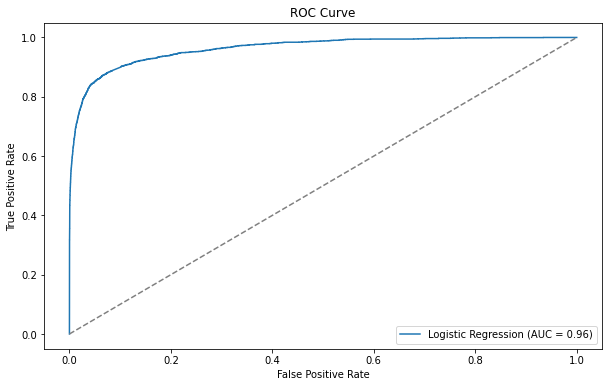

In [28]:
# Построение ROC кривой
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Вывод:

На основе полученных метрик и графика ROC-кривой можно сделать следующие выводы о производительности модели LGBMClassifier:

- Модель демонстрирует хорошую способность к идентификации как положительных, так и отрицательных классов.

- Кривая ROC показывает, что модель имеет высокую способность к различию  между положительными и отрицательными классами. Это означает, что модель может эффективно уменьшить количество ложных положительных и ложных отрицательных предсказаний.

- Высокий результат F1 указывает на то, что модель хорошо сбалансирована.

- Модель показывает высокую точность предсказаний, что свидетельствует о её общей эффективности в классификации.


Исходя из всех этих факторов, можно сказать, что LGBMClassifier является надежным и эффективным выбором для данной задачи классификации, демонстрируя отличные результаты по всем ключевым метрикам.

## Выводы

- Избавились от дублирующего и неинформативного столбца Unnamed: 0
* Привели текст к нижнему регистру
* Удалили пунктуации и специальные символы
* Удалили стоп-слова
* Выполнили лемматизацию (приведение слов к их базовой форме)

- Оставили только один столбец с текстом, который использовали дальше, а точнее:
    - clean_text - очищенный текст.

После построения графиков распределения целевого признака выяснили, что:
* 89.8% комментариев нетоксичные.
* 10.2% комментариев токсичные.

- Это указывало на значительный дисбаланс классов, с преобладанием нетоксичных комментариев. 
- Пришли к выводу, что дисбаланс нужно учитывать при построении моделей машинного обучения, так как он может влиять на качество модели.


- Использовали методы для работы с несбалансированными данными, такие как:
    * Oversampling: Увеличение количества примеров меньшего класса (токсичные).
    * Undersampling: Уменьшение количества примеров большего класса (нетоксичные).
    * Взвешивание классов: Использование взвешенных потерь для модели машинного обучения, чтобы учесть дисбаланс классов.


- Эти методы помогли создать более сбалансированные и надежные модели.


- Выяснили, что использование взвешивания классов помогает лучше справляться с дисбалансом классов.



- Разделили данные на обучающую, валидационную и тестовую выборки.
- Использовали TfidfVectorizer для преобразования текстовых данных в числовой формат.
- Обучили модели LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, и LGBMClassifier с различными гиперпараметрами с использованием взвешивания классов.
- Оценим модели на валидационной выборке по метрике F1.
- Составили таблицу с названием модели и значением метрики F1 на валидационной выборке.



Выбрали **LGBMClassifier для тестирования**, выбор обосновывается эффективностью, быстродействием, способностью к обобщению и гибкостью настройки, что делает мощным инструментом для решения широкого круга задач машинного обучения.


На основе полученных метрик и графика ROC-кривой для лучшей модели сделали следующие выводы о производительности модели:

- Модель продемострировала хорошую способность к идентификации как положительных, так и отрицательных классов.

- Кривая ROC показала, что модель имеет высокую способность к различию  между положительными и отрицательными классами. Это означает, что модель может эффективно уменьшить количество ложных положительных и ложных отрицательных предсказаний.

- Высокий результат F1 указывает на то, что модель хорошо сбалансирована.

- Модель показывает высокую точность предсказаний, что свидетельствует о её общей эффективности в классификации.


Исходя из всех этих факторов, можно сказать, что модель является надежным и эффективным выбором для данной задачи классификации, демонстрируя отличные результаты по всем ключевым метрикам.